# Task #1 of Deep Learning Course- MIT - ICESI 

1. Load libraies

In [92]:
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
import pylab as pl

2. Load digits

In [93]:
digits = load_digits()

# 7

3. Print some sevens

In [94]:
targets = digits.target 
indices = [i for i,x in enumerate(targets) if x == 7] #identifying seven indices
#indices

pl.gray() # Queremos las im치genes en grises
for i in indices[10:40]:
    #print(digits.images[i])  # Imprimir una imagen dada
    #pl.gray() # Queremos las im치genes en grises
    #pl.matshow(digits.images[i]) # Imprimir una imagen dada
    pass

It seems like there are two types of 7s: 1. The above line is straight, and 2. The above line is ascendent.

There are some patterns identified: 
    1. The first column is black (number less than or equal to 3). 
    2. The lower-right corner (positions [5][7], [6][7], [7][7], [7][6], [7][5], [6][6]) is black (number less than or equal to 3). 
    3.1. For the first type of 7, almost always there is a black (number less than or equal to 3) line in the 3rd row until the 3rd column (pos [2][2]). 
    3.2. For the second type of 7, it has a black pixel (number less than or equal to 3) wether in [2][3] or in [2][4].

In [111]:
def column(matrix, i):
    return [row[i] for row in matrix]

def is_black(lista): 
    return all(number <= 3 for number in lista)

In [141]:
def is_seven(digit):
    #print (digit)
    
    #1. The first column is black (number less than or equal to 3).
    
    first_column = column(digit, 0)
    fcb = is_black(first_column) #first column black
    #print(fcb)

    #2. The lower-right corner (positions [5][7], [6][7], [7][7], [7][6], [7][5], [6][6]) is black (number less than or equal to 3). 

    lr_corner= [digit[5][7], digit[6][7], digit[7][7], digit[7][6], digit[7][5], digit[6][6]]
    lrb= is_black(lr_corner)
    #print(lr_corner)

    #3.1. For the first type of 7, almost always there is a black (number less than or equal to 3) line in the 3rd row until the 3rd column (pos [2][2]). 

    third_row = [digit[2][0], digit[2][1], digit[2][2]]
    trb = is_black(third_row)
    #print(trb)

    #3.2. For the second type of 7, it has a black pixel (number less than or equal to 3) wether in [2][3] or in [2][4].

    alb = digit[2][3] <= 3 or digit[2][4] <= 3  # ascendent line black
    #print(alb)

    #3

    tc = trb or alb # third condition
    #print(tc)

    result= fcb and lrb and tc
    return result
    #print(result)

In [144]:
#is_seven(digits.images[7])

Confusion Matrix

In [145]:
y_true= [digit==7 for digit in digits.target]
y_pred = [is_seven(digit) for digit in digits.images]
#print (y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tp, fp, fn, tn)

167 355 12 1263


In [146]:
acc = (tp+tn)/(tp+fp+fn+tn)
err = (fp+fn)/(tp+fp+fn+tn)
pre = tp/(tp+fp)
rec = tp/(tp+fn)
spe = tn/(tn+fp)

print (acc, err, pre, rec, spe)

0.7957707289927657 0.2042292710072343 0.31992337164750956 0.9329608938547486 0.7805933250927071


<b> Accuracy = 80% and Error rate = 20%: </b> This means that 80% of the numbers all well classified.
<br>
<b> Precision (PPV) = 32%: </b> This means that the proportion of positive results is low. This is because the negative values are considerably more than positive values. 
<br>
<b> Recall (TPR) = 93%: </b> This means that the proportion of actual positives that are correctly identified as such is very high. 
<br>
<b> Specificity (TNR) = 78%: </b> This means that the proportion of actual negatives that are correctly identified as such is high.

# 9

Print some nines

[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]
[[ 0.  0.  6. 14.  4.  0.  0.  0.]
 [ 0.  0. 11. 16. 10.  0.  0.  0.]
 [ 0.  0.  8. 14. 16.  2.  0.  0.]
 [ 0.  0.  1. 12. 12. 11.  0.  0.]
 [ 0.  0.  0.  0.  0. 11.  3.  0.]
 [ 0.  0.  0.  0.  0.  5. 11.  0.]
 [ 0.  0.  1.  4.  4.  7. 16.  2.]
 [ 0.  0.  7. 16. 16. 13. 11.  1.]]
[[ 0.  0.  9. 13.  7.  0.  0.  0.]
 [ 0.  0. 12. 16. 16.  2.  0.  0.]
 [ 0.  0. 12. 13. 16.  6.  0.  0.]
 [ 0.  0.  6. 16. 16. 14.  0.  0.]
 [ 0.  0.  0.  0.  2. 16.  3.  0.]
 [ 0.  0.  0.  0.  0.  9. 10.  0.]
 [ 0.  0.  3.  7. 12. 14. 16.  2.]
 [ 0.  0.  7. 12. 12. 12. 11.  0.]]
[[ 0.  0.  2. 13.  8.  0.  0.  0.]
 [ 0.  0.  6. 16. 16.  6.  0.  0.]
 [ 0.  0.  5. 15. 13. 11.  0.  0.]
 [ 0.  0.  0.  7. 16. 15.  0.  0.]
 [ 0.  0.  0.  0.

C:\Users\bryan\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[[ 0.  0.  6. 12. 13.  5.  0.  0.]
 [ 0.  2. 16.  9.  8. 15.  2.  0.]
 [ 0.  8. 12.  0.  3. 15.  8.  0.]
 [ 0.  4. 15. 12. 16. 13.  1.  0.]
 [ 0.  0.  2.  2. 16.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  1.  0.  0.]
 [ 0.  0.  0.  5. 16.  0.  0.  0.]
 [ 0.  0.  3. 16. 14.  0.  0.  0.]]
[[ 0.  0.  4. 14. 16. 15.  1.  0.]
 [ 0.  5. 16.  8.  4. 16.  7.  0.]
 [ 0.  8. 13.  0.  4. 16. 12.  0.]
 [ 0.  7. 16. 15. 16. 13.  3.  0.]
 [ 0.  0.  6. 12. 16.  4.  0.  0.]
 [ 0.  0.  0. 11. 12.  0.  0.  0.]
 [ 0.  0.  0. 16.  7.  0.  0.  0.]
 [ 0.  0.  3. 16.  2.  0.  0.  0.]]
[[ 0.  0.  9. 16. 12.  2.  0.  0.]
 [ 0.  0. 16.  3.  5. 10.  0.  0.]
 [ 0.  0. 13.  4. 14. 16.  4.  0.]
 [ 0.  0.  4. 16. 16. 16.  7.  0.]
 [ 0.  0.  0.  3.  4. 10.  4.  0.]
 [ 0.  0.  0.  0.  0.  8.  6.  0.]
 [ 0.  0. 12.  1.  1. 13.  3.  0.]
 [ 0.  0.  8. 15. 16.  9.  0.  0.]]
[[ 0.  0.  3. 11. 13.  5.  0.  0.]
 [ 0.  0. 10. 12.  5. 16.  0.  0.]
 [ 0.  0.  7. 10.  6. 15.  4.  0.]
 [ 0.  0.  2. 13. 16. 14.  6.  0.]
 [ 0.  0.  0.  0.

[[ 0.  0.  4. 13. 12.  6.  0.  0.]
 [ 0.  4. 15.  5. 10. 16.  0.  0.]
 [ 0.  4. 16.  1. 11. 16.  0.  0.]
 [ 0.  1. 10. 16. 13. 16.  2.  0.]
 [ 0.  0.  0.  4.  0. 15.  3.  0.]
 [ 0.  0.  0.  0.  0. 12.  4.  0.]
 [ 0.  0.  6.  6.  0.  9.  8.  0.]
 [ 0.  0.  5. 12. 15. 16.  7.  0.]]
[[ 0.  0.  5. 14. 14.  8.  2.  0.]
 [ 0.  3. 15.  3.  0. 13.  8.  0.]
 [ 0.  5. 12.  0.  2. 15.  8.  0.]
 [ 0.  2. 15.  9. 14. 14.  8.  0.]
 [ 0.  0.  1.  3.  0. 12.  5.  0.]
 [ 0.  0.  0.  0.  0. 12.  4.  0.]
 [ 0.  6. 15.  2.  0. 14.  1.  0.]
 [ 0.  1.  7. 14. 12.  9.  0.  0.]]
[[ 0.  0.  3. 13. 14.  4.  0.  0.]
 [ 0.  0. 13. 12. 14. 16.  0.  0.]
 [ 0.  1. 16.  3. 14. 16.  4.  0.]
 [ 0.  1. 14.  9. 16. 16.  6.  0.]
 [ 0.  0.  2.  8.  4. 11.  9.  0.]
 [ 0.  0.  2.  2.  0. 12. 10.  0.]
 [ 0.  0. 14. 14.  4. 11.  9.  0.]
 [ 0.  0.  4.  8. 11. 16.  9.  0.]]
[[ 0.  0.  0.  3. 13. 16. 11.  0.]
 [ 0.  0.  4. 15. 11.  8. 16.  3.]
 [ 0.  2. 15.  9.  6. 13. 15.  3.]
 [ 0.  4. 16. 16. 16. 16. 11.  0.]
 [ 0.  0.  7.  8.

[[ 0.  1. 10. 15. 15.  3.  0.  0.]
 [ 0.  6. 13.  4. 10. 12.  0.  0.]
 [ 0.  4. 11.  0.  7. 15.  0.  0.]
 [ 0.  2. 14. 16. 16. 14.  2.  0.]
 [ 0.  0.  1.  4.  3. 10.  6.  0.]
 [ 0.  0.  0.  0.  0.  2. 12.  0.]
 [ 0.  0.  3.  3.  0.  2. 13.  0.]
 [ 0.  0. 10. 16. 16. 16. 11.  0.]]
[[ 0.  0.  9. 15. 14.  8.  0.  0.]
 [ 0.  6. 16.  4.  2. 16.  3.  0.]
 [ 0.  5. 16.  5.  5. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 16.  4.  0.]
 [ 0.  0.  0.  0.  0.  9.  8.  0.]
 [ 0.  0.  0.  0.  0.  8.  8.  0.]
 [ 0.  2. 10.  2.  1. 12.  6.  0.]
 [ 0.  1. 13. 14. 14. 11.  1.  0.]]
[[ 0.  0.  6. 14. 15.  7.  0.  0.]
 [ 0.  3. 15.  6.  2. 14.  3.  0.]
 [ 0.  4. 13.  0.  1. 16.  4.  0.]
 [ 0.  0. 10. 11.  9. 16.  6.  0.]
 [ 0.  0.  1.  8. 10. 14.  5.  0.]
 [ 0.  0.  0.  0.  0.  8. 11.  0.]
 [ 0.  1. 12.  5.  0. 10. 11.  0.]
 [ 0.  0.  7. 13. 16. 16.  4.  0.]]
[[ 0.  0.  7. 13. 10.  1.  0.  0.]
 [ 0.  1. 15.  3.  9. 10.  0.  0.]
 [ 0.  3. 16.  4. 13. 11.  0.  0.]
 [ 0.  0.  6. 12. 12. 16.  0.  0.]
 [ 0.  0.  0.  0.

[[ 0.  2. 14. 16. 16.  7.  0.  0.]
 [ 0.  6. 15.  5.  6. 13.  0.  0.]
 [ 0.  4. 15.  0.  9. 16.  6.  0.]
 [ 0.  2. 13. 16. 16. 15.  9.  0.]
 [ 0.  0.  1.  4.  2. 15.  8.  0.]
 [ 0.  0.  0.  0.  1. 16.  6.  0.]
 [ 0.  0.  0.  1. 12. 15.  2.  0.]
 [ 0.  1. 14. 16. 16.  6.  0.  0.]]
[[ 0.  1. 14. 16. 15.  4.  0.  0.]
 [ 0.  4. 16.  9. 11. 15.  3.  0.]
 [ 0.  6. 16.  1.  8. 16.  2.  0.]
 [ 0.  2. 14. 10. 15. 16.  6.  0.]
 [ 0.  0.  3. 11.  8. 15.  5.  0.]
 [ 0.  0.  0.  0.  1. 16.  5.  0.]
 [ 0.  0.  3.  3. 11. 15.  1.  0.]
 [ 0.  0. 13. 16. 14.  4.  0.  0.]]
[[ 0.  0.  9. 16. 16. 10.  0.  0.]
 [ 0.  2. 16.  9. 11. 11.  0.  0.]
 [ 0.  0. 15.  7. 12. 16.  3.  0.]
 [ 0.  0.  7. 16. 15. 15.  7.  0.]
 [ 0.  0.  0.  0.  0. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 11. 10.  0.]
 [ 0.  0. 11.  2.  6. 16.  6.  0.]
 [ 0.  0.  9. 16. 16. 11.  1.  0.]]
[[ 0.  0.  9. 15. 13.  3.  0.  0.]
 [ 0.  2. 14.  2.  6.  5.  0.  0.]
 [ 0.  4.  9.  0.  0. 15.  4.  0.]
 [ 0.  1. 13.  5.  7. 16.  6.  0.]
 [ 0.  0.  2.  7.

[[ 0.  0.  1. 13. 10.  1.  0.  0.]
 [ 0.  0. 12.  6.  7. 10.  0.  0.]
 [ 0.  0. 10. 10. 11. 15.  0.  0.]
 [ 0.  0.  1. 14. 16. 16.  5.  0.]
 [ 0.  0.  0.  0.  0. 10. 10.  0.]
 [ 0.  0.  0.  0.  0.  5. 11.  0.]
 [ 0.  0.  2.  4.  4. 14. 11.  0.]
 [ 0.  0.  2. 11. 15. 16.  5.  0.]]
[[ 0.  0.  0.  8. 10. 14.  3.  0.]
 [ 0.  1. 13. 13.  9. 12.  8.  0.]
 [ 0.  6. 16.  8.  8. 16.  4.  0.]
 [ 0.  5. 16. 16. 16.  9.  0.  0.]
 [ 0.  0.  5.  8. 14. 12.  0.  0.]
 [ 0.  0.  0.  3. 16.  5.  0.  0.]
 [ 0.  0.  0. 15.  8.  0.  0.  0.]
 [ 0.  0.  1. 12.  2.  0.  0.  0.]]
[[ 0.  0.  7. 16. 15.  4.  0.  0.]
 [ 0.  0. 11. 16. 15. 12.  0.  0.]
 [ 0.  0.  5. 16. 16. 14.  0.  0.]
 [ 0.  0.  0.  3.  8. 15.  5.  0.]
 [ 0.  0.  0.  0.  0. 10. 10.  0.]
 [ 0.  0.  0.  0.  0. 11. 11.  0.]
 [ 0.  0.  1.  0.  5. 15.  9.  0.]
 [ 0.  0.  6. 15. 16. 16.  2.  0.]]
[[ 0.  0.  7. 16. 16.  8.  0.  0.]
 [ 0.  0. 14. 12. 11. 14.  0.  0.]
 [ 0.  0. 11. 15. 16. 12.  0.  0.]
 [ 0.  0.  5. 15. 15.  4.  0.  0.]
 [ 0.  0.  0.  3.

<Figure size 432x288 with 0 Axes>

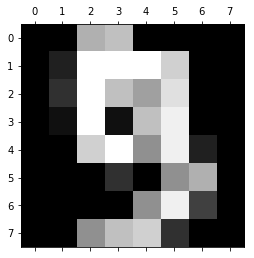

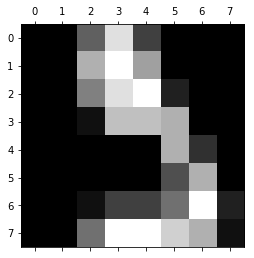

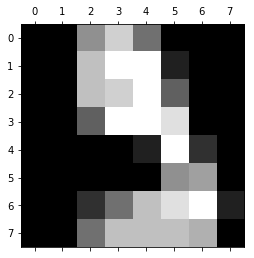

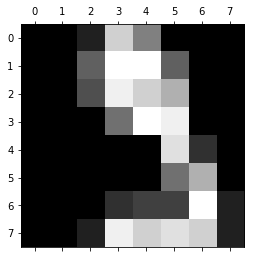

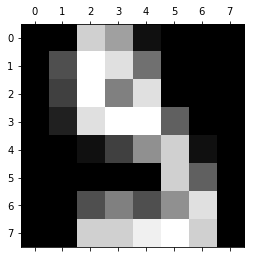

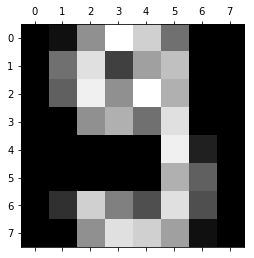

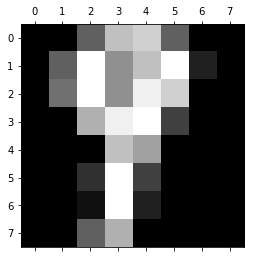

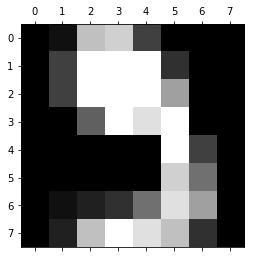

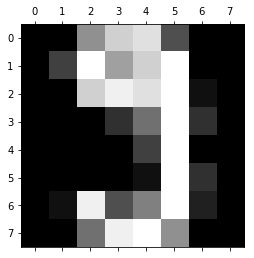

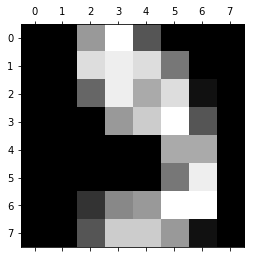

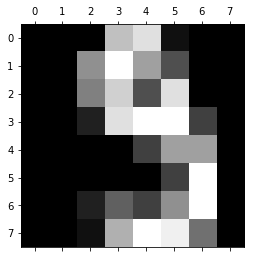

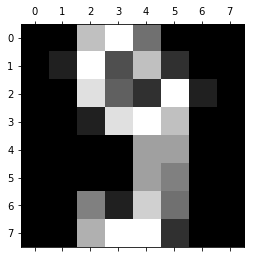

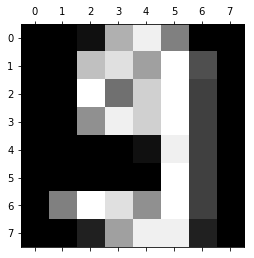

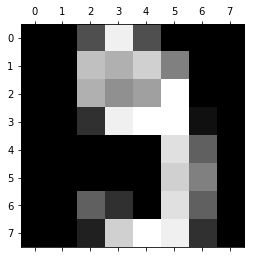

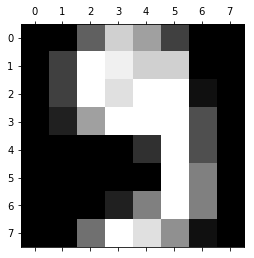

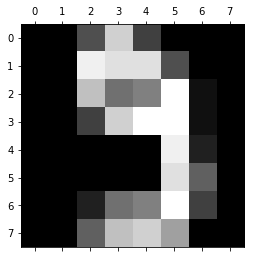

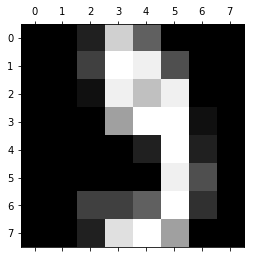

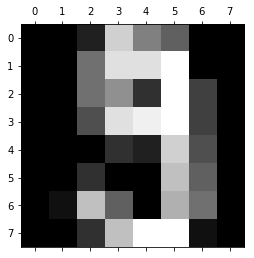

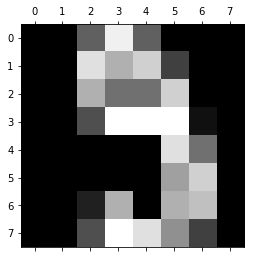

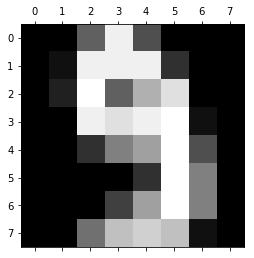

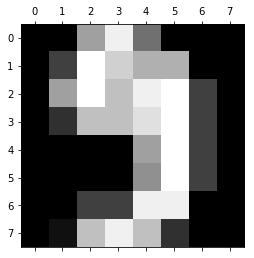

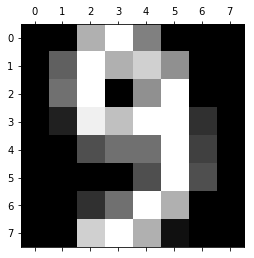

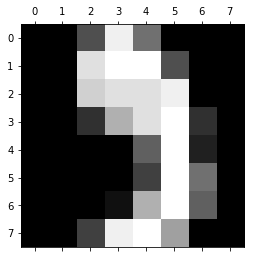

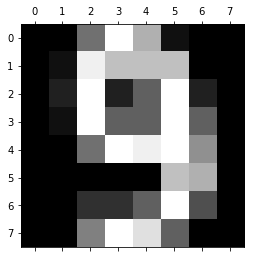

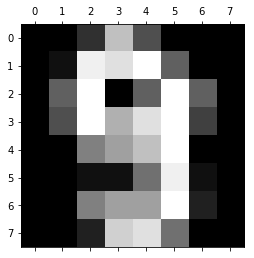

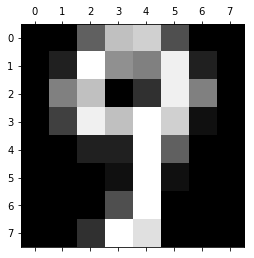

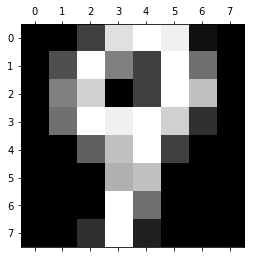

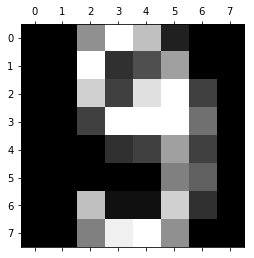

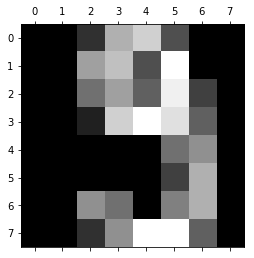

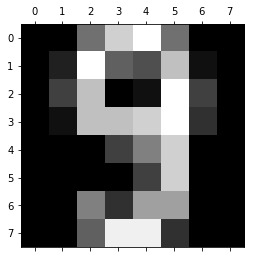

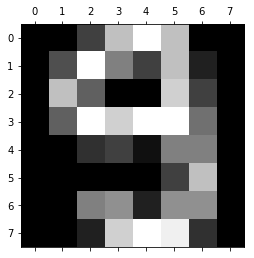

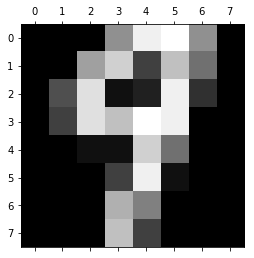

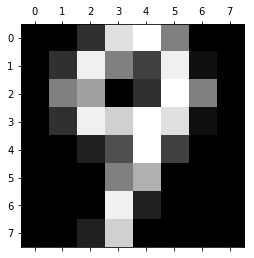

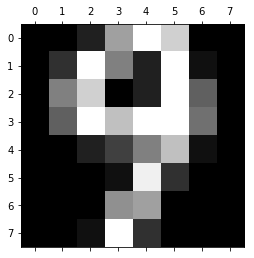

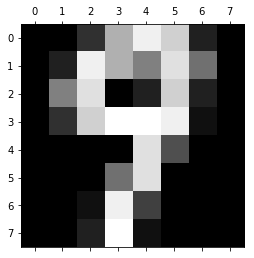

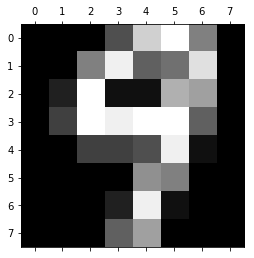

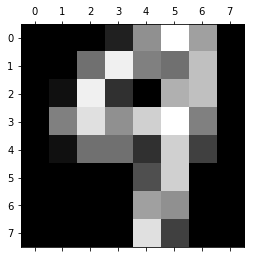

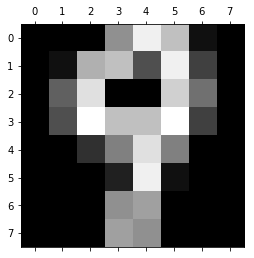

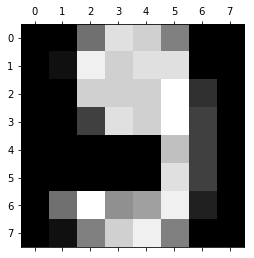

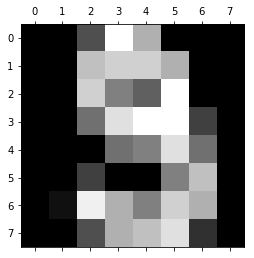

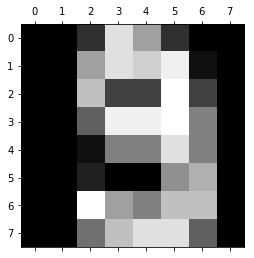

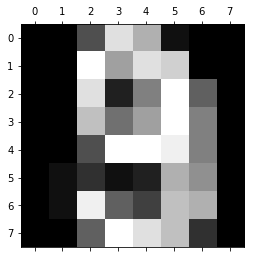

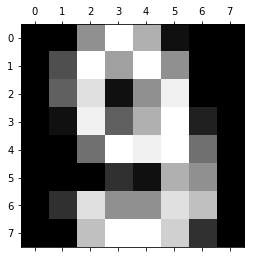

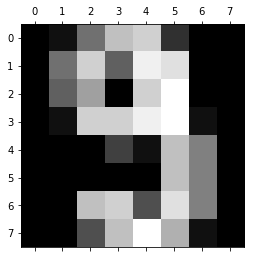

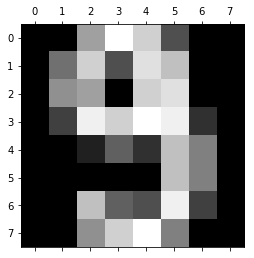

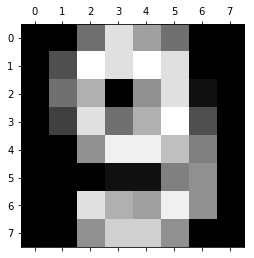

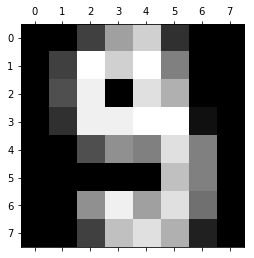

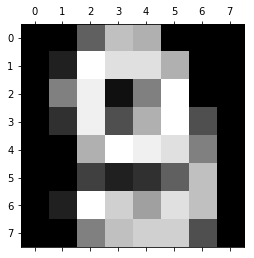

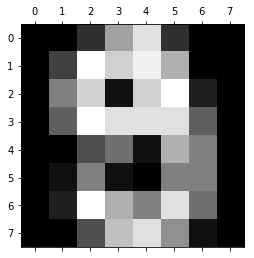

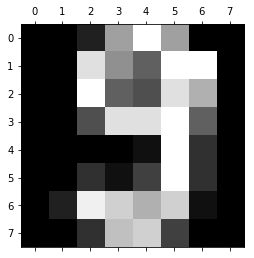

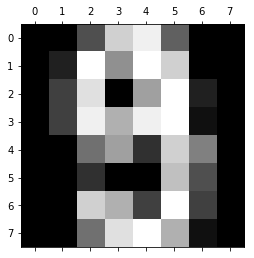

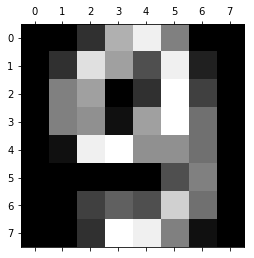

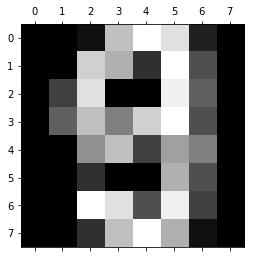

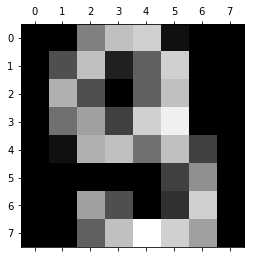

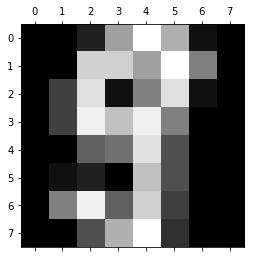

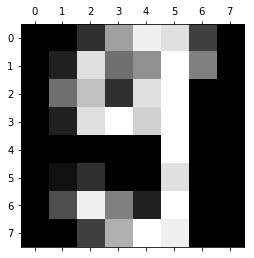

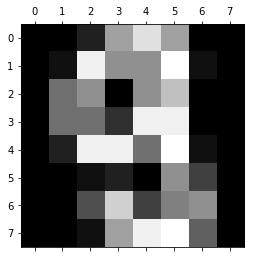

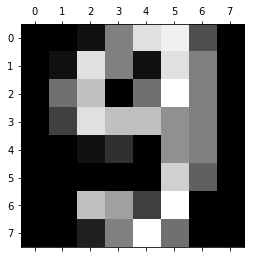

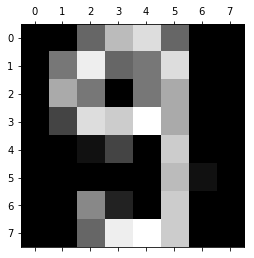

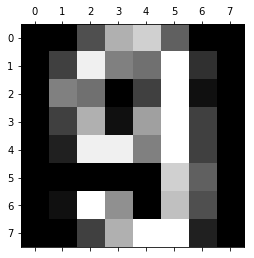

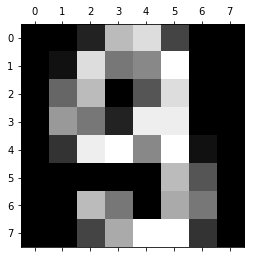

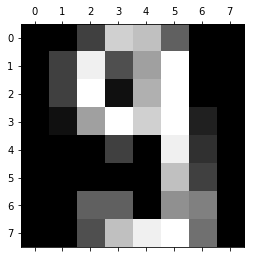

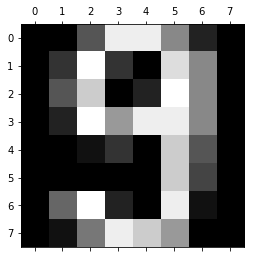

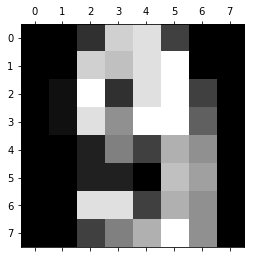

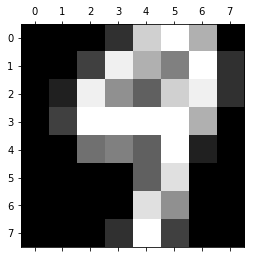

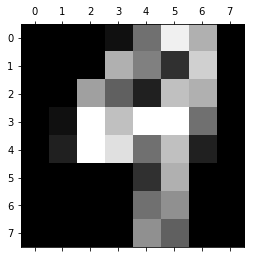

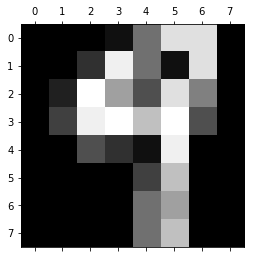

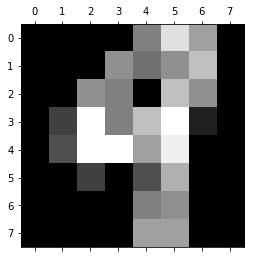

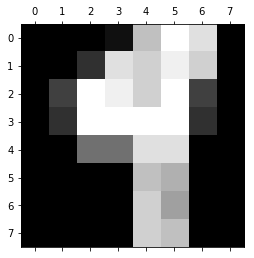

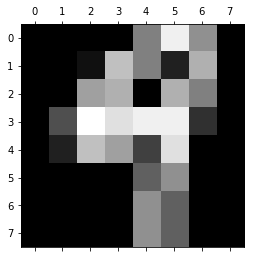

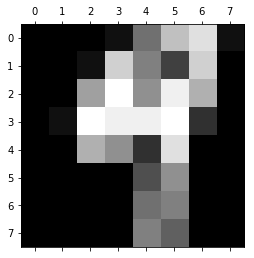

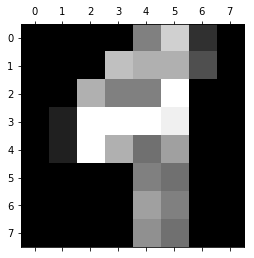

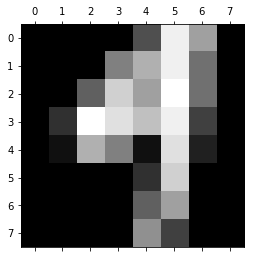

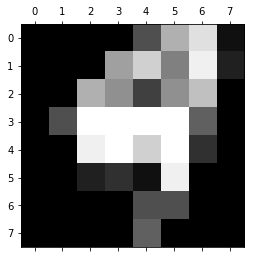

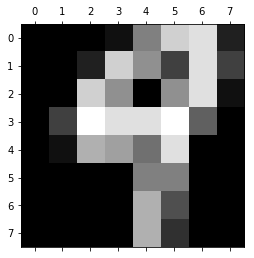

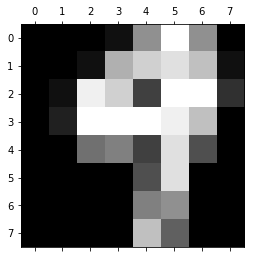

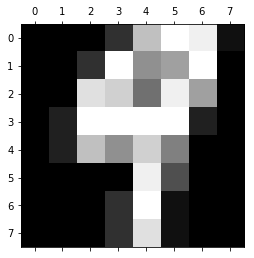

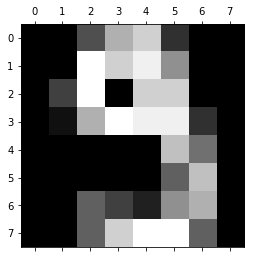

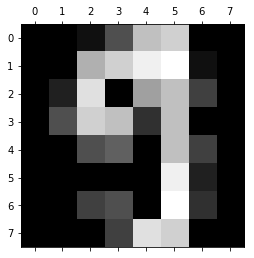

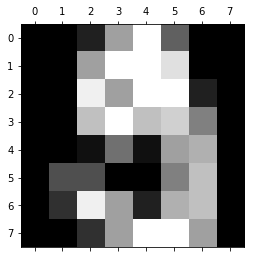

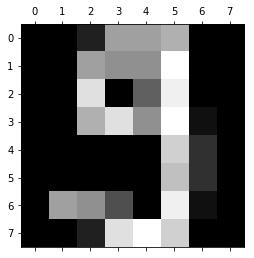

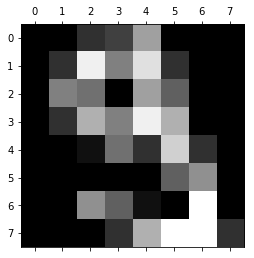

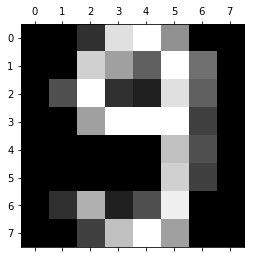

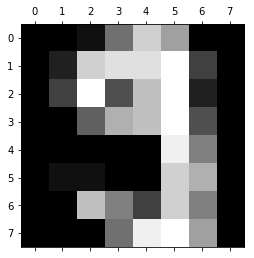

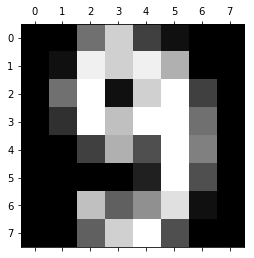

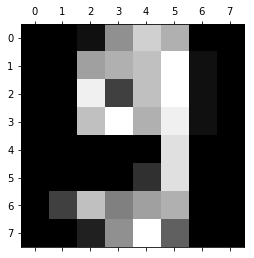

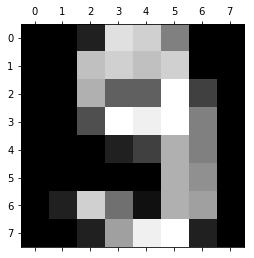

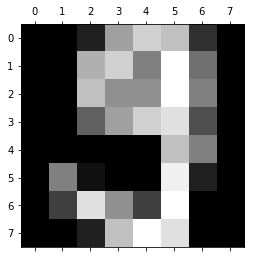

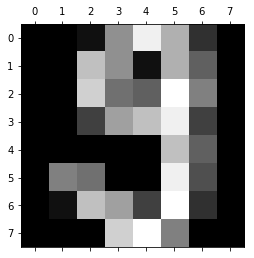

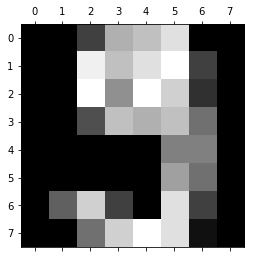

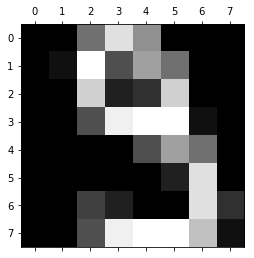

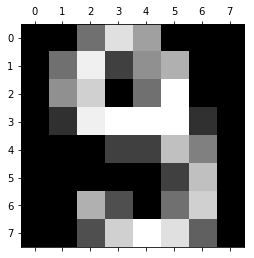

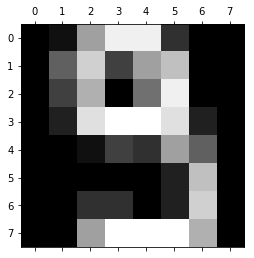

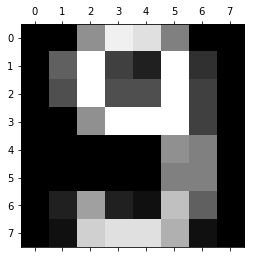

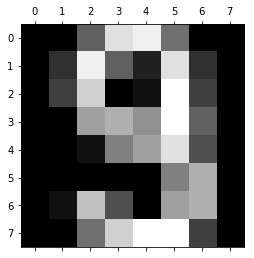

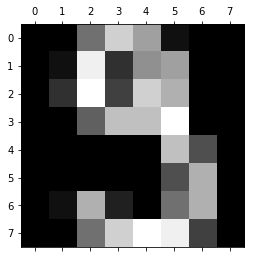

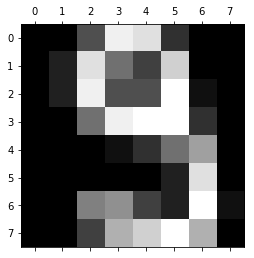

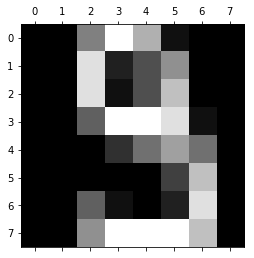

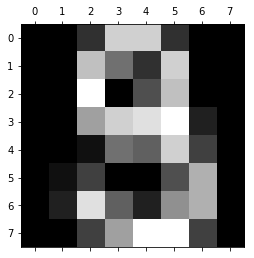

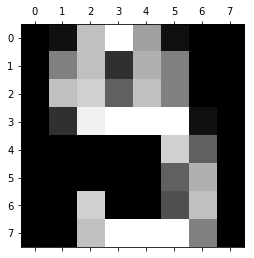

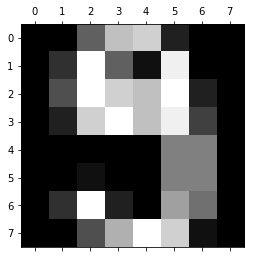

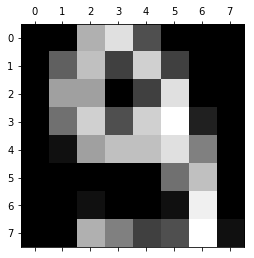

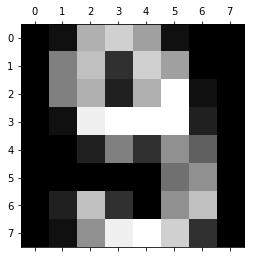

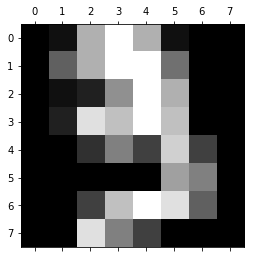

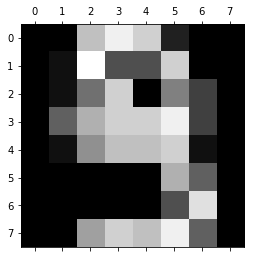

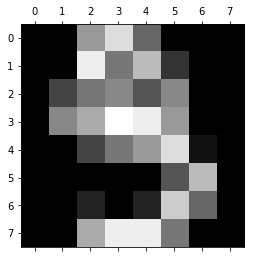

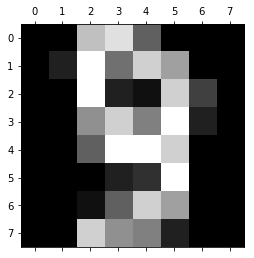

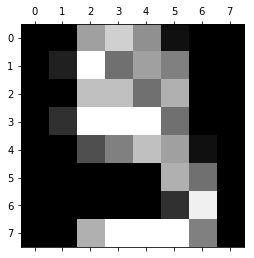

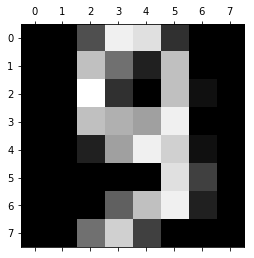

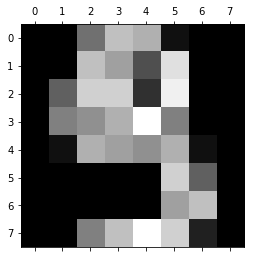

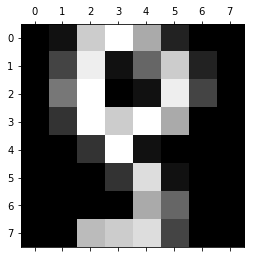

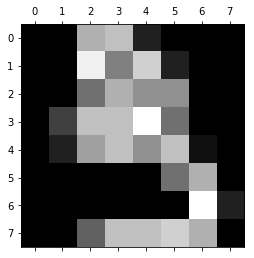

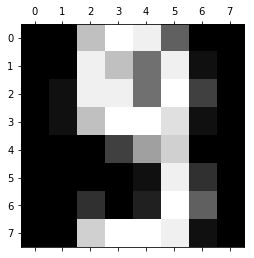

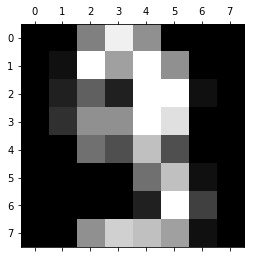

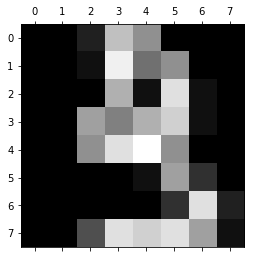

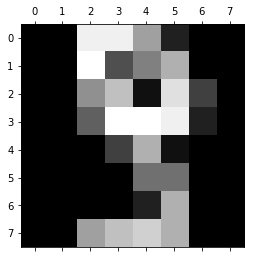

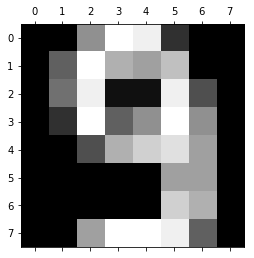

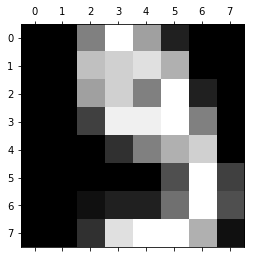

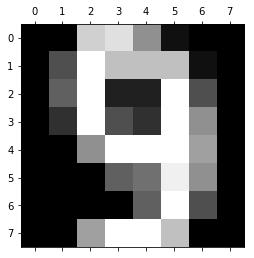

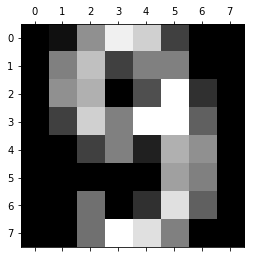

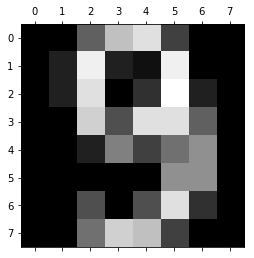

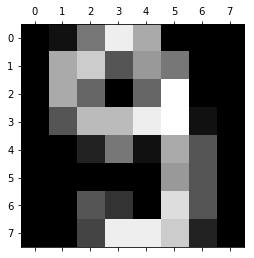

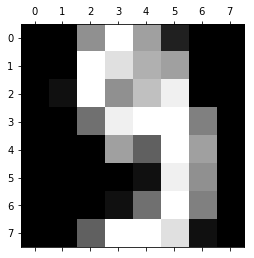

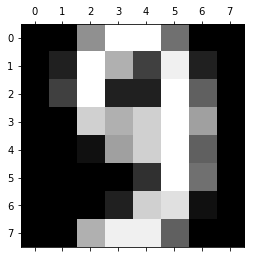

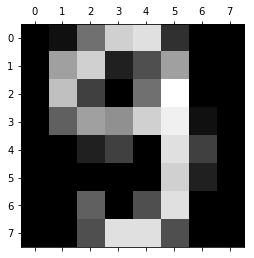

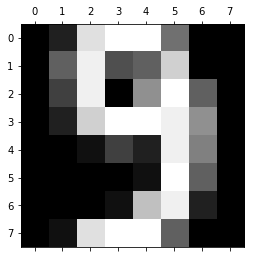

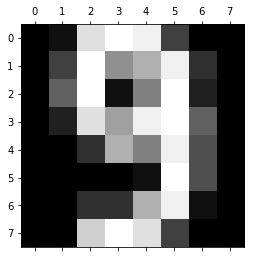

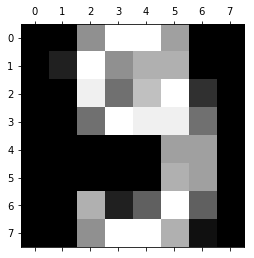

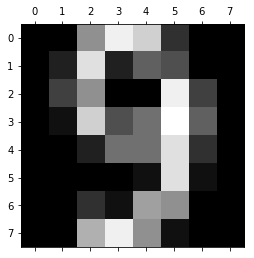

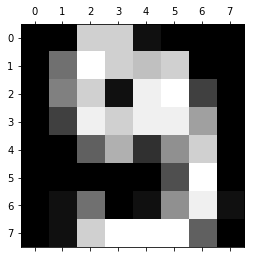

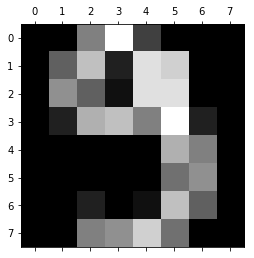

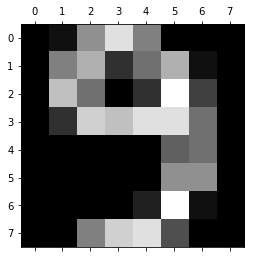

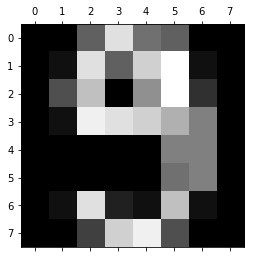

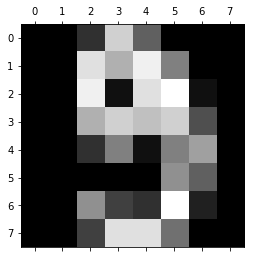

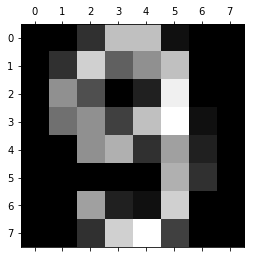

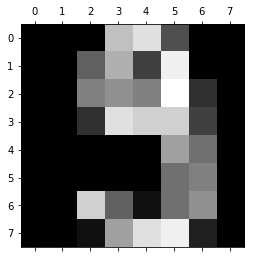

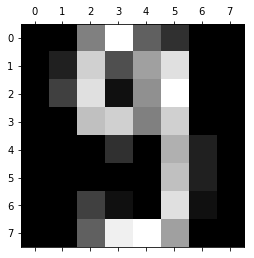

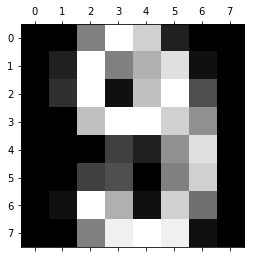

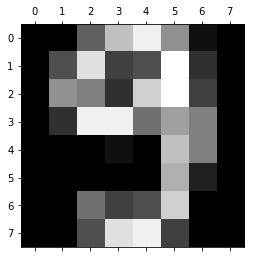

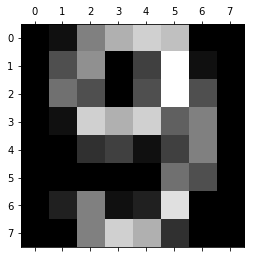

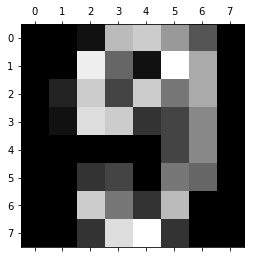

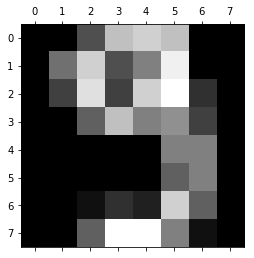

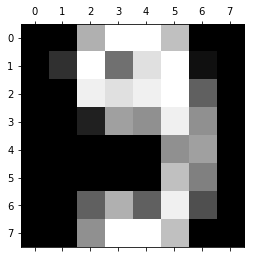

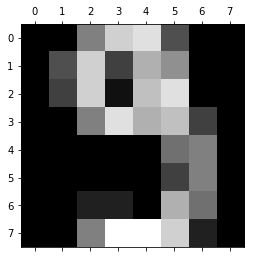

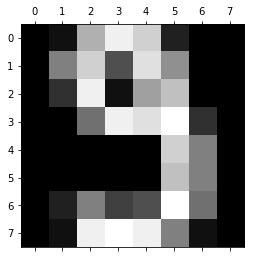

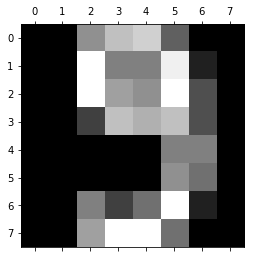

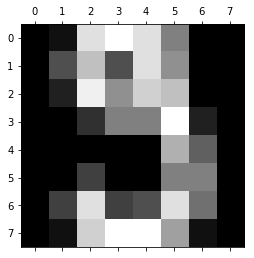

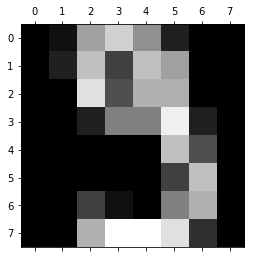

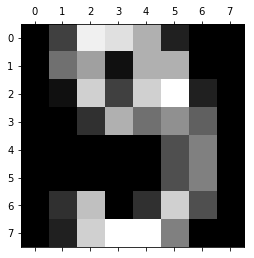

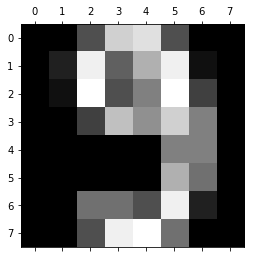

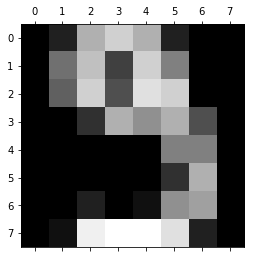

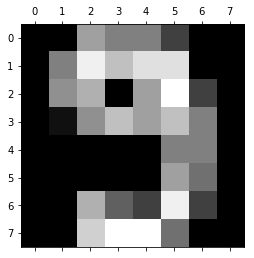

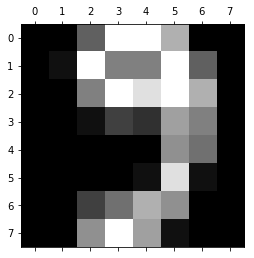

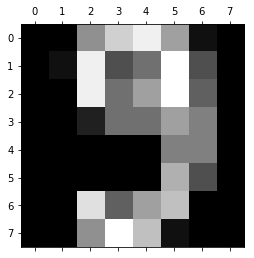

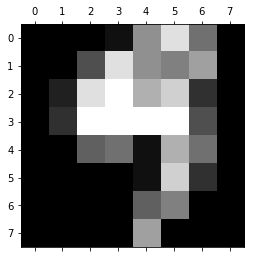

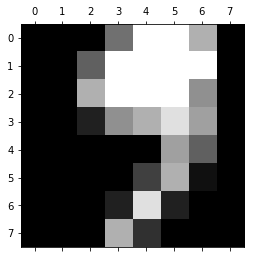

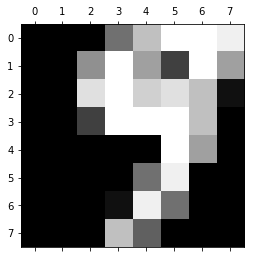

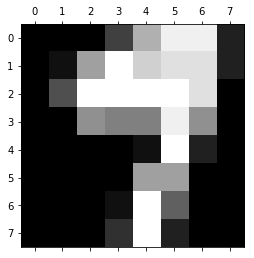

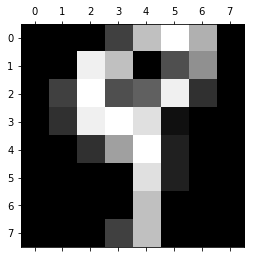

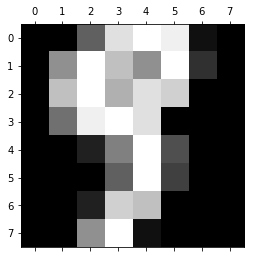

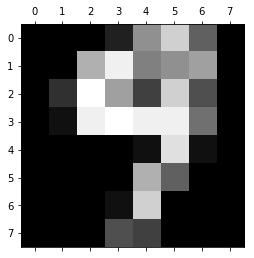

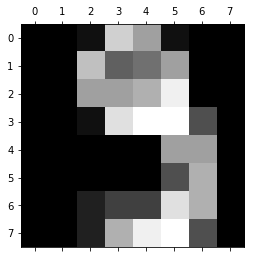

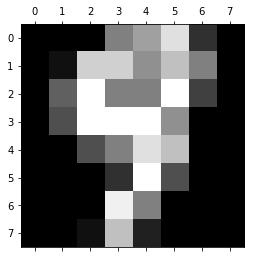

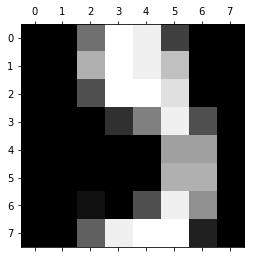

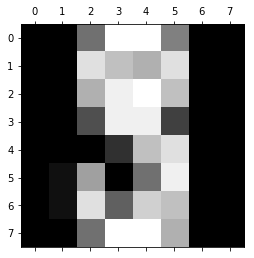

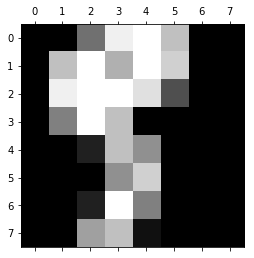

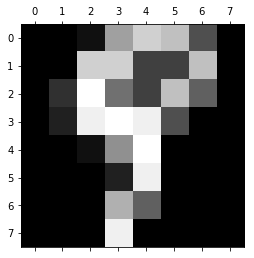

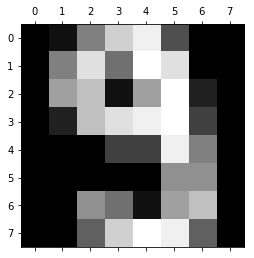

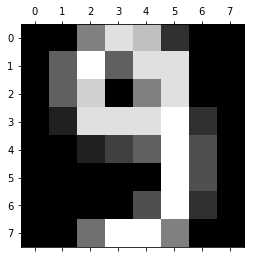

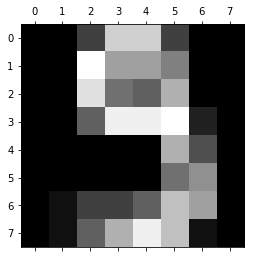

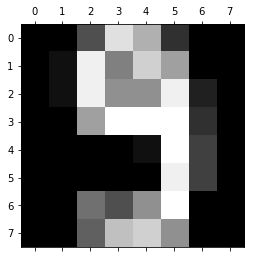

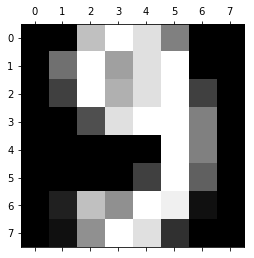

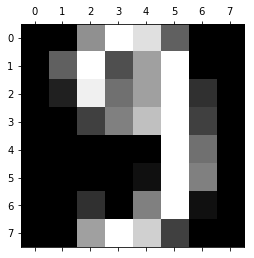

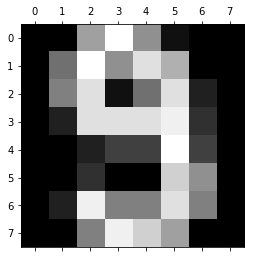

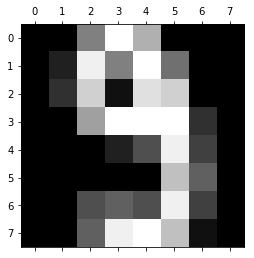

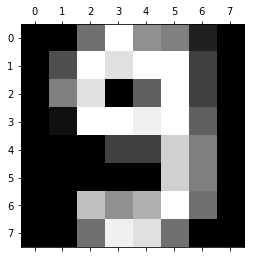

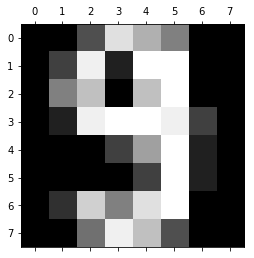

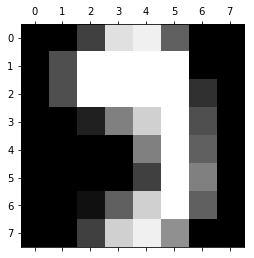

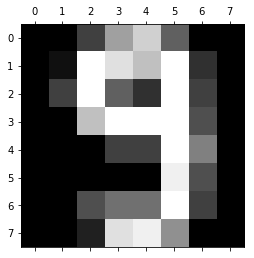

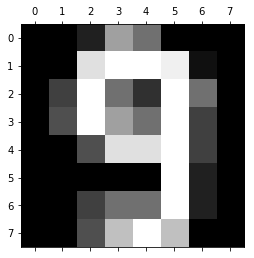

In [138]:
targets = digits.target 
indices = [i for i,x in enumerate(targets) if x == 9] #identifying seven indices
#indices

pl.gray() # Queremos las im치genes en grises
for i in indices:
    print(digits.images[i])  # Imprimir una imagen dada
    pl.gray() # Queremos las im치genes en grises
    pl.matshow(digits.images[i]) # Imprimir una imagen dada
    pass

There are some patterns identified: 
    1. The first column is black (number less than or equal to 3). 
    2.1. The upper-right corner (positions [0][7], [0][6], [1][7]) is black (number less than or equal to 3). 
    2.2. The lower-right corner (positions [5][7], [6][7], [7][7], [7][6], [7][5], [6][6]) is black (number less than or equal to 3). 
    3.1 There is a black (number less than or equal to 3) line in the 5th row until the 4th column (pos [4][3]).
    3.2 There is a black (number less than or equal to 3) line in the 6th row until the 4th column (pos [5][3]). 

In [185]:
#def is_almost_black(lista): 
 #   return all(number <= 5 for number in lista)

In [186]:
def is_nine(digit):
    #print (digit)
    
    #1. The first column is black (number less than or equal to 3).
    
    first_column = column(digit, 0)
    fcb = is_black(first_column) #first column black
    #print(fcb)

    #2.1. The upper-right corner (positions [0][7], [0][6], [1][7]) is black (number less than or equal to 3). 
    
    ur_corner= [digit[0][7], digit[0][6], digit[1][7]]
    urb= is_black(ur_corner)
    #print(urb)
    
    #2.2. The lower-right corner (positions [5][7], [6][7], [7][7], [7][6], [7][5], [6][6]) is black (number less than or equal to 3). 
    
    lr_corner= [digit[5][7], digit[6][7], digit[7][7], digit[7][6], digit[7][5], digit[6][6]]
    lrb= is_black(lr_corner)
    #print(lrb)
    
    #2 
    
    sc = urb or lrb  #second condition

    #3.1. There is a almost black (number less than or equal to 5) line in the 5th row until the 4th column (pos [4][3]).

    fifth_row = [digit[4][0], digit[4][1], digit[4][2], digit[4][3]]
    frb = is_black(fifth_row)
    #print(frb)

    #3.2. There is a almost black (number less than or equal to 5) line in the 6th row until the 4th column (pos [5][3]). 

    sixth_row = [digit[5][0], digit[5][1], digit[5][2], digit[5][3]]
    srb = is_black(sixth_row)
    #print(srb)

    #3

    tc = frb or srb # third condition
    #print(tc)

    result= fcb and sc and tc
    return result
    #print(result)

In [187]:
#is_nine(digit)

Confusion Matrix

In [188]:
y_true= [digit==9 for digit in digits.target]
y_pred = [is_nine(digit) for digit in digits.images]
#print (y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tp, fp, fn, tn)

156 350 24 1267


In [189]:
acc = (tp+tn)/(tp+fp+fn+tn)
err = (fp+fn)/(tp+fp+fn+tn)
pre = tp/(tp+fp)
rec = tp/(tp+fn)
spe = tn/(tn+fp)

print (acc, err, pre, rec, spe)

0.7918753478018921 0.20812465219810797 0.308300395256917 0.8666666666666667 0.7835497835497836


<b> Accuracy = 79% and Error rate = 21%: </b> This means that 79% of the numbers all well classified.
<br>
<b> Precision (PPV) = 31%: </b> This means that the proportion of positive results is low. This is because the negative values are considerably more than positive values. 
<br>
<b> Recall (TPR) = 87%: </b> This means that the proportion of actual positives that are correctly identified as such is considerably high. 
<br>
<b> Specificity (TNR) = 78%: </b> This means that the proportion of actual negatives that are correctly identified as such is high.